In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
from google.colab import files
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

In [ ]:
def detectar_placa(img):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Aplicar un filtro bilateral para reducir el ruido mientras se preservan los bordes
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
    # Detectar bordes utilizando el algoritmo Canny
    edged = cv2.Canny(bfilter, 30, 200)

    # Encontrar contornos en la imagen
    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = keypoints[0] if len(keypoints) == 2 else keypoints[1]
    # Ordenar los contornos por área, de mayor a menor, y tomar los 10 más grandes
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    location = None
    for contour in contours:
        # Aproximar el contorno a un polígono
        approx = cv2.approxPolyDP(contour, 10, True)
        # Si el polígono tiene 4 vértices, asumimos que es la placa
        if len(approx) == 4:
            location = approx
            break

    if location is not None:
        # Crear una máscara para aislar la región de la placa
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [location], 0, 255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)

        # Extraer la región de la placa
        (x, y) = np.where(mask == 255)
        (x1, y1) = (np.min(x), np.min(y))
        (x2, y2) = (np.max(x), np.max(y))
        placa_img = gray[x1:x2+1, y1:y2+1]

        return placa_img

    return None

def reconocer_placa(placa_img):
    # Inicializar el lector OCR para español
    reader = easyocr.Reader(['es'])
    # Realizar OCR en la imagen de la placa
    result = reader.readtext(placa_img)
    if result:
        # Devolver el texto reconocido
        return result[0][-2]
    return None

def reconocer_placa_consola():
    print("Por favor, selecciona una imagen del vehículo:")
    uploaded = files.upload()

    if not uploaded:
        print("No se seleccionó ninguna imagen.")
        return

    # Leer la imagen subida
    image_path = next(iter(uploaded))
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Detectar la placa en la imagen
    placa_img = detectar_placa(img)
    if placa_img is not None:
        # Reconocer el texto de la placa
        texto_placa = reconocer_placa(placa_img)
        if texto_placa:
            print(f"Placa detectada: {texto_placa}")
            plt.figure(figsize=(10,5))
            plt.subplot(121)
            plt.imshow(img_rgb)
            plt.title("Imagen original")
            plt.axis('off')
            plt.subplot(122)
            plt.imshow(placa_img, cmap='gray')
            plt.title("Placa detectada")
            plt.axis('off')
            plt.show()
        else:
            print("No se pudo reconocer el texto de la placa")
    else:
        print("No se detectó ninguna placa en la imagen")

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250210075857500,4299LDY,9998.jpg to S1,CAM2,250210075857500,4299LDY,9998.jpg
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompletePlaca detectada: 4299 LDY;


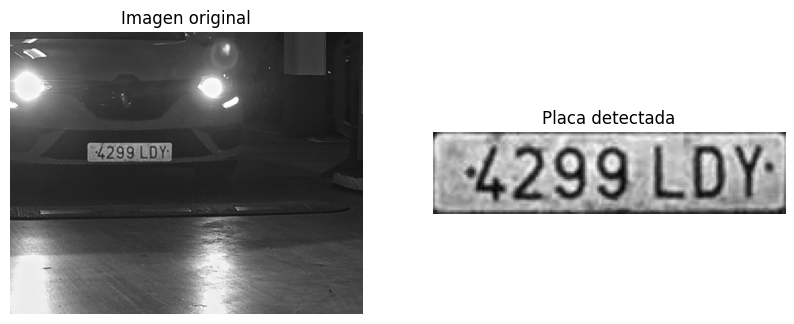

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving E1,CAM1,250210064336628,0973LJK,9998.jpg to E1,CAM1,250210064336628,0973LJK,9998.jpg
Placa detectada: 0973 LJK


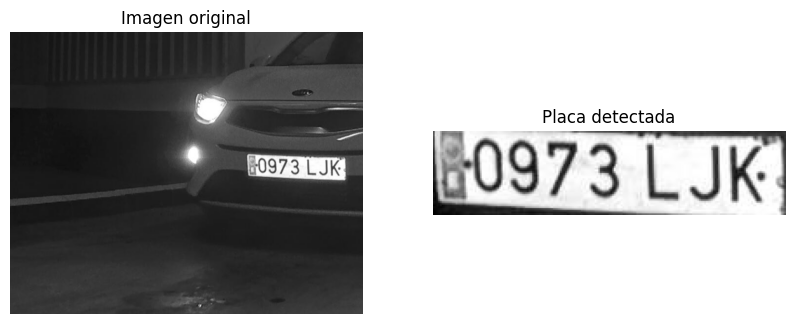

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving E1,CAM1,250210071153350,6203MML,9986.jpg to E1,CAM1,250210071153350,6203MML,9986.jpg
Placa detectada: 6203 MML


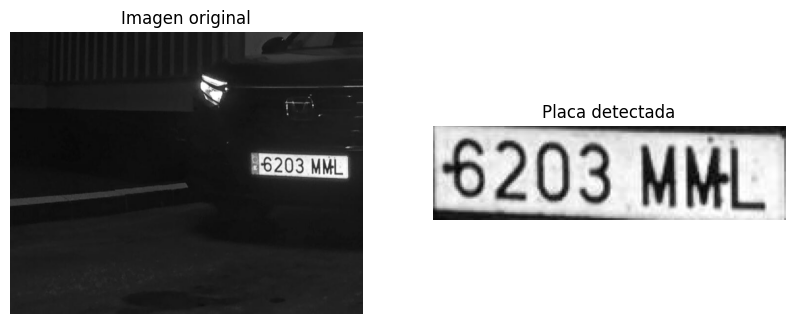

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250210003447734,8485MSR,9977.jpg to S1,CAM2,250210003447734,8485MSR,9977.jpg
Placa detectada: 8485 MSR


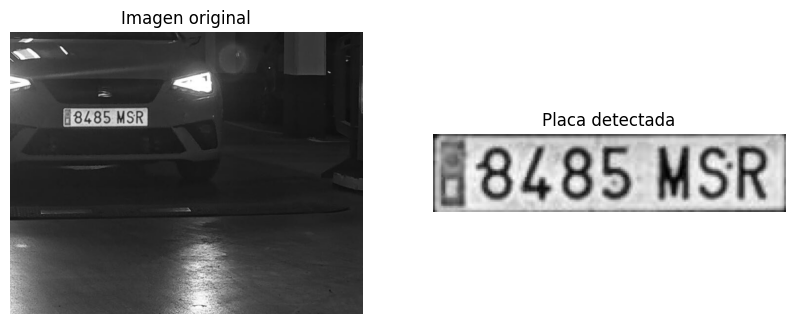

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250210062310690,1022LFJ,9995.jpg to S1,CAM2,250210062310690,1022LFJ,9995.jpg
Placa detectada: 1022 LFJ


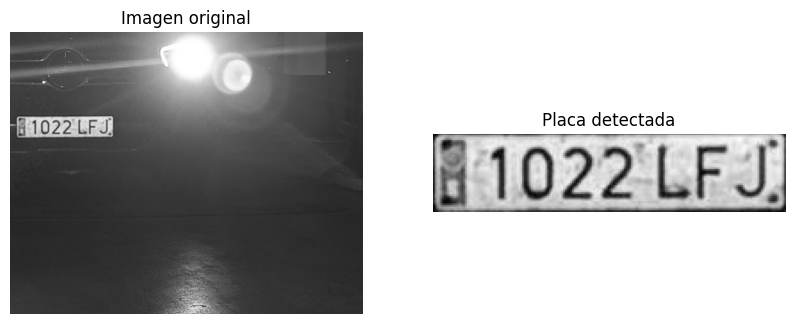

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250210114456058,0927CNV,9994.jpg to S1,CAM2,250210114456058,0927CNV,9994.jpg
Placa detectada: 0927  CNV:


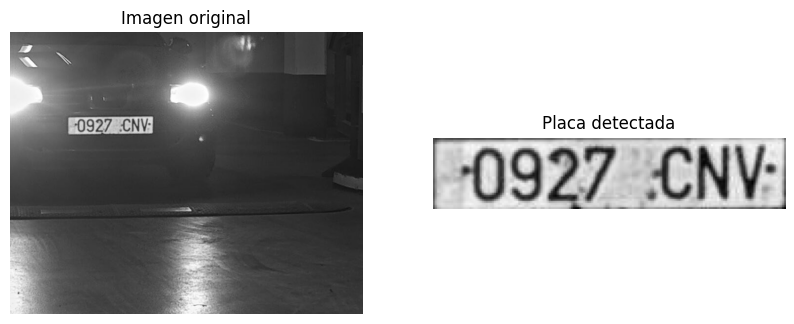

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250210110234643,0973LJK,9997.jpg to S1,CAM2,250210110234643,0973LJK,9997.jpg
Placa detectada: 0973 LJK


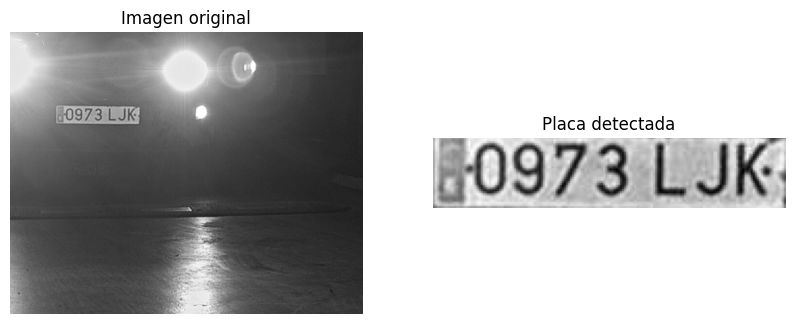

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving car - copia.png to car - copia.png
Placa detectada: MCLRNF1


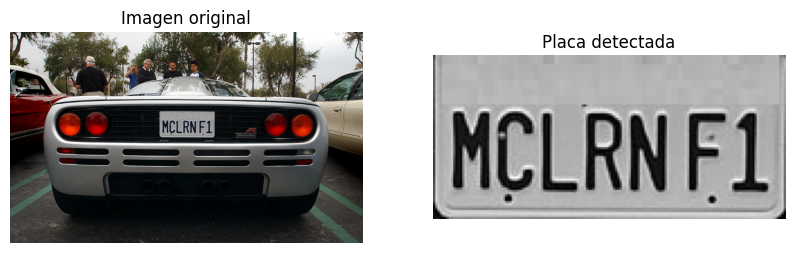

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving car6 - copia.jpg to car6 - copia.jpg
Placa detectada: MHO14Y8866


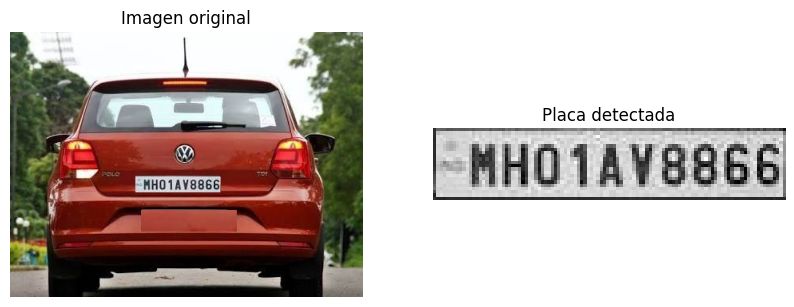

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250211050117817,6968MLH,9999.jpg to S1,CAM2,250211050117817,6968MLH,9999.jpg
Placa detectada: 6968 MLH


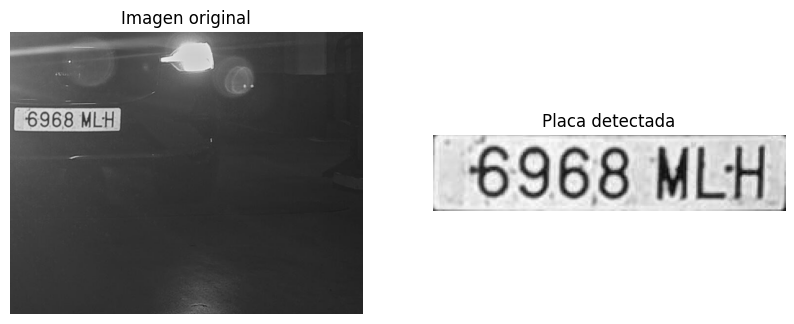

In [ ]:
# Uso
reconocer_placa_consola()

Por favor, selecciona una imagen del vehículo:


Saving S1,CAM2,250212080334322,1542LYC,10000.jpg to S1,CAM2,250212080334322,1542LYC,10000.jpg
Placa detectada: 1542 LYC


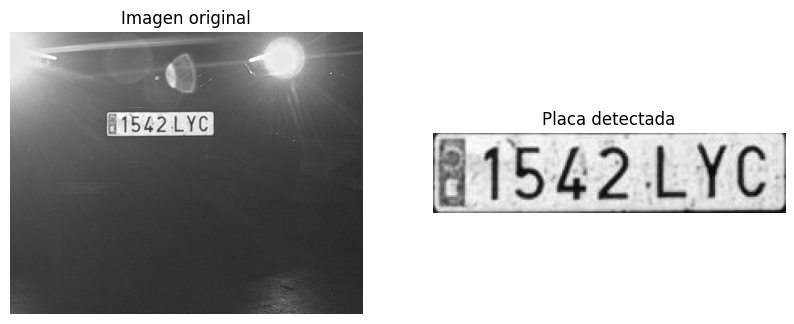

In [ ]:
# Uso
reconocer_placa_consola()